## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import shutil
import random
import cv2
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! unzip "/content/drive/MyDrive/Imarticus/pga-04/08 DL/cnn/data_out.zip"

In [ ]:
# to know current working directory

os.getcwd()

'/content'

In [ ]:
os.chdir("data_out")

In [ ]:
os.getcwd()

'/content'

In [ ]:
os.chdir("/content")

In [ ]:
# to list file names in a folder

os.listdir(os.getcwd())

['.config', 'data_out', 'drive', 'sample_data']

In [ ]:
# join paths/ make paths
path = os.path.join(os.getcwd(),"data_out")
path

'/content/data_out'

In [ ]:
os.path.join("content", "data_out", "Happy")

'content/data_out/Happy'

In [ ]:
path

'/content/data_out'

In [ ]:
# check existing path

os.path.exists(path)

True

In [ ]:
os.path.exists(os.path.join(path, "neutral"))

False

In [ ]:
# split path
os.path.split("/content/data_out/Angry")[-1]

'Angry'

In [ ]:
# to make folder
os.mkdir(os.path.join("data_out","temp"))

In [ ]:
# to move file
src = "/content/sample_data/california_housing_test.csv"
dst = os.path.join(os.getcwd(), "temp")
shutil.move(src, dst)

'/content/temp/california_housing_test.csv'

In [ ]:
# shuffle data

img = os.listdir(os.path.join("data_out", "Angry"))
len(img)

172

In [ ]:
type(img)

list

In [ ]:
img[:5]

['img_Angry_414.jpg',
 'img_Angry_428.jpg',
 'img_Angry_450.jpg',
 'img_Angry_134.jpg',
 'img_Angry_59.jpg']

In [ ]:
random.seed(42)
img2 = img.copy()
random.shuffle(img2)

In [ ]:
img2[:5]

['img_Angry_16.jpg',
 'img_Angry_54.jpg',
 'img_Angry_44.jpg',
 'img_Angry_100.jpg',
 'img_Angry_78.jpg']

In [ ]:
img2[:5]

['img_Angry_16.jpg',
 'img_Angry_54.jpg',
 'img_Angry_44.jpg',
 'img_Angry_100.jpg',
 'img_Angry_78.jpg']

In [ ]:
num_train = int(0.8 * len(img))
num_train

137

In [ ]:
train_img = img[:num_train]
test_img = img[num_train:]

In [ ]:
len(test_img)

35

In [ ]:
paths = {
    "data": os.path.join(os.getcwd(),"data"),
    "train": os.path.join(os.getcwd(),"data","train"),
    "test": os.path.join(os.getcwd(),"data","test")
}

In [ ]:
paths["train"]

'/content/data/train'

In [ ]:
# os.mkdir(paths["data"], exist_ok = True)

TypeError: ignored

In [ ]:
os.mkdir(paths["data"])
os.mkdir(paths["train"])
os.mkdir(paths["test"])

In [ ]:
os.mkdir(os.path.join(paths["train"], "Angry"))
os.mkdir(os.path.join(paths["test"], "Angry"))

In [ ]:
/content/data_out/Angry/img_Angry_0.jpg

In [ ]:
folder_path = "/content/data_out/Angry"
img_name = "img_Angry_0.jpg"

os.path.join(folder_path, img_name)

'/content/data_out/Angry/img_Angry_0.jpg'

In [ ]:
train_img[:5]

['img_Angry_414.jpg',
 'img_Angry_428.jpg',
 'img_Angry_450.jpg',
 'img_Angry_134.jpg',
 'img_Angry_59.jpg']

In [ ]:
for i in train_img:
  src_path = os.path.join(folder_path, i)
  dst_path = os.path.join(paths["train"], "Angry")
  shutil.copy(src_path,dst_path)

## create function for data prepration

In [ ]:
def img_prep(folder_path, test_size = 0.2):
  paths = {
    "data": os.path.join(os.getcwd(),"data"),
    "train": os.path.join(os.getcwd(),"data","train"),
    "test": os.path.join(os.getcwd(),"data","test")
  }

  folder_name = os.path.split(folder_path)[-1]
  img_names = os.listdir(folder_path)

  # shuffle img_names
  random.seed(42)
  random.shuffle(img_names)

  #split into train-test
  num_test = int(test_size * len(img_names))
  test_img = img_names[:num_test]
  train_img = img_names[num_test:]

  # create folders
  if not(os.path.exists(paths["data"])):
    os.mkdir(paths["data"])

  if not(os.path.exists(paths["train"])):
    os.mkdir(paths["train"])

  if not(os.path.exists(paths["test"])):
    os.mkdir(paths["test"])


  # make category folder
  os.mkdir(os.path.join(paths["train"], folder_name))
  os.mkdir(os.path.join(paths["test"], folder_name))

  dst_train_path = os.path.join(paths["train"], folder_name)
  dst_test_path = os.path.join(paths["test"], folder_name)

  # train loop
  for img in train_img:
    src_train_path = os.path.join(folder_path, img)
    shutil.move(src_train_path, dst_train_path)

  # test loop
  for img in test_img:
    src_test_path = os.path.join(folder_path, img)
    shutil.move(src_test_path, dst_test_path)

  print(f"for {folder_name} category")
  print(f"no. of train_images: {len(train_img)}")
  print(f"no. of test_images: {len(test_img)}")
  print("---*---" * 5)

In [ ]:
for folder in os.listdir("data_out"):
  img_prep(os.path.join("data_out", folder))

for Angry category
no. of train_images: 136
no. of test_images: 33
---*------*------*------*------*---
for Sad category
no. of train_images: 106
no. of test_images: 26
---*------*------*------*------*---
for Happy category
no. of train_images: 165
no. of test_images: 41
---*------*------*------*------*---


In [ ]:
paths = {
    "data": os.path.join(os.getcwd(),"data"),
    "train": os.path.join(os.getcwd(),"data","train"),
    "test": os.path.join(os.getcwd(),"data","test")
  }

In [ ]:
# Walk through data directory and list number of files
for dirpath, dirnames, filenames in os.walk(paths["data"]):
  print(f"There are {len(dirnames)} folder and {len(filenames)} images in '{dirpath}'.")

There are 2 folder and 0 images in '/content/data'.
There are 3 folder and 0 images in '/content/data/train'.
There are 0 folder and 136 images in '/content/data/train/Angry'.
There are 0 folder and 106 images in '/content/data/train/Sad'.
There are 0 folder and 165 images in '/content/data/train/Happy'.
There are 3 folder and 0 images in '/content/data/test'.
There are 0 folder and 33 images in '/content/data/test/Angry'.
There are 0 folder and 26 images in '/content/data/test/Sad'.
There are 0 folder and 41 images in '/content/data/test/Happy'.


In [ ]:
height = []
width = []
for folder in os.listdir(paths["train"]):
  for file in os.listdir(os.path.join(paths["train"], folder)):
    img_path = os.path.join(paths["train"], folder , file)
    img = cv2.imread(img_path)
    img_height = img.shape[0]
    img_width = img.shape[1]
    height.append(img_height)
    width.append(img_width)

In [ ]:
pd.Series(height).describe()

count     418.000000
mean      363.174641
std       222.619893
min       106.000000
25%       216.250000
50%       315.500000
75%       435.500000
max      1622.000000
dtype: float64

In [ ]:
pd.Series(width).describe()

count     418.000000
mean      363.174641
std       222.619893
min       106.000000
25%       216.250000
50%       315.500000
75%       435.500000
max      1622.000000
dtype: float64

In [ ]:
pd.Series(height).mode()

0    385
dtype: int64

<Axes: ylabel='Density'>

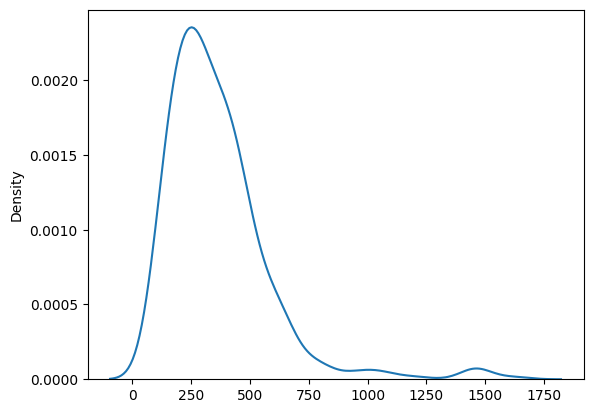

In [ ]:
sns.kdeplot(pd.Series(height))

In [ ]:
# image_dataset_from_directory

import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory

train_ds = image_dataset_from_directory(
    directory = paths["train"],
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(350, 350),
    shuffle=True,
    seed=42
)

test_ds = image_dataset_from_directory(
    directory = paths["test"],
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(350, 350),
    shuffle = False
)

Found 418 files belonging to 3 classes.


In [ ]:
test_ds = image_dataset_from_directory(
    directory = paths["test"],
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(350, 350),
    shuffle = False
)

Found 103 files belonging to 3 classes.


In [ ]:
418/32

13.0625

In [ ]:
for img, label in test_ds.take(4):
  print(img)
  print(label)

tf.Tensor(
[[[[ 95.88438     84.88438     82.88438   ]
   [ 83.1617      73.03598     71.03598   ]
   [ 77.95902     67.95902     65.95902   ]
   ...
   [126.53495    100.423615    99.12549   ]
   [ 99.19752     77.06629     72.44337   ]
   [ 95.94256     76.94256     71.16238   ]]

  [[ 93.91089     80.28803     79.16232   ]
   [ 81.63367     70.63367     68.63367   ]
   [ 78.19167     67.19167     65.19167   ]
   ...
   [123.5428      95.77985     91.0687    ]
   [112.89177     87.853134    83.995346  ]
   [103.567604    83.514435    79.76584   ]]

  [[ 94.2609      80.2609      79.2609    ]
   [ 87.50857     74.622856    73.25143   ]
   [ 80.83347     69.83347     67.83347   ]
   ...
   [126.19975     98.45683     92.57121   ]
   [125.83499     97.83499     94.83499   ]
   [112.918976    91.54178     89.76659   ]]

  ...

  [[ 72.62854     37.62854     31.62854   ]
   [ 72.39149     37.39149     31.39149   ]
   [ 72.25711     38.514256    33.88568   ]
   ...
   [232.46695    211.766

In [ ]:
train_ds.class_names

['Angry', 'Happy', 'Sad']

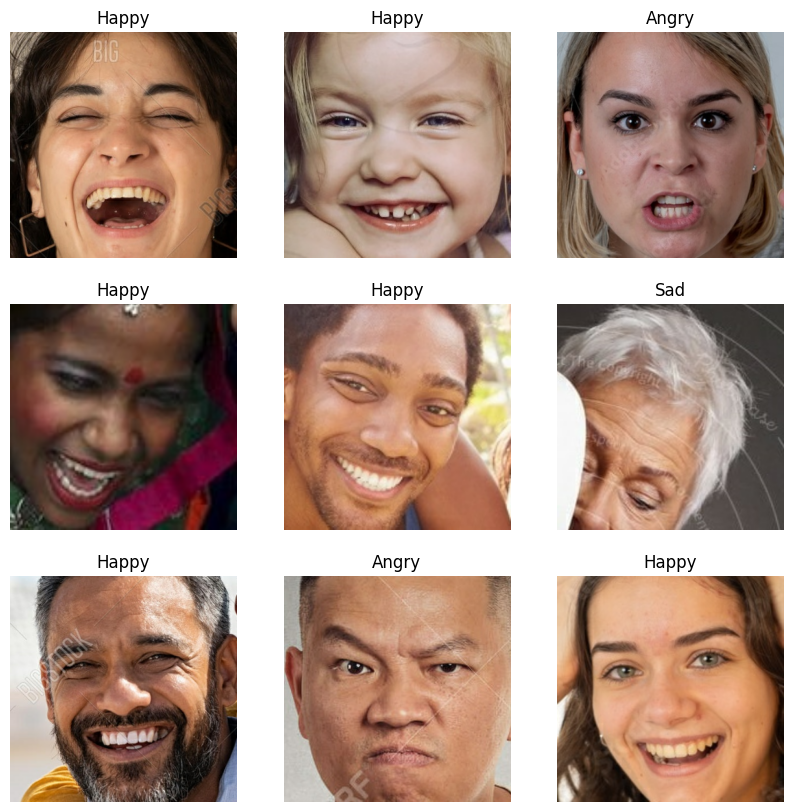

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")

In [ ]:
# model building
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, GlobalMaxPooling2D


model = tf.keras.models.Sequential([
    InputLayer(input_shape = (350,350,3)),
    Conv2D(
        filters = 10,
        kernel_size = (3,3),
        strides=(1,1),
        padding='valid',
        activation = "relu"
    ),
    Conv2D(10,3,1,activation = "relu"),
    MaxPooling2D(),
    Conv2D(10,3,1,activation = "relu"),
    Conv2D(10,3,1,activation = "relu"),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation = "relu"),
    Dense(64, activation = "relu"),
    Dense(3, activation = "softmax")
])

model.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

result = model.fit(
    train_ds, validation_data = test_ds, epochs = 5
)



Epoch 1/5
14/14 [==============================] - 102s 7s/step - loss: 3.3586 - accuracy: 0.4856 - val_loss: 0.9302 - val_accuracy: 0.6311
Epoch 2/5
14/14 [==============================] - 76s 5s/step - loss: 0.5208 - accuracy: 0.8660 - val_loss: 0.7418 - val_accuracy: 0.7379
Epoch 3/5
14/14 [==============================] - 72s 5s/step - loss: 0.1710 - accuracy: 0.9737 - val_loss: 0.9526 - val_accuracy: 0.7184
Epoch 4/5
14/14 [==============================] - 73s 5s/step - loss: 0.0395 - accuracy: 0.9952 - val_loss: 1.1612 - val_accuracy: 0.6893
Epoch 5/5
14/14 [==============================] - 77s 5s/step - loss: 0.0250 - accuracy: 0.9952 - val_loss: 1.1649 - val_accuracy: 0.7184


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 348, 348, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 346, 346, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 173, 173, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 171, 171, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 169, 169, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 84, 84, 10)        0         
 g2D)                                                 

## DATA AUGMENTATION

In [ ]:
# from image data generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1.0/ 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=(0.2, 0.8),
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip = True
)
test_datagen = ImageDataGenerator(
    rescale = 1.0/255
)

In [ ]:
train_ds = train_datagen.flow_from_directory(
    directory = paths["train"],
    target_size = (350,350),
    class_mode = "sparse",
    batch_size = 32,
    shuffle = True,
    seed = 42
)

test_ds = test_datagen.flow_from_directory(
    directory = paths["test"],
    target_size = (350,350),
    class_mode = "sparse",
    batch_size = 32,
    shuffle = False
)

Found 407 images belonging to 3 classes.
Found 100 images belonging to 3 classes.


In [ ]:
# model building
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, GlobalMaxPooling2D


model1 = tf.keras.models.Sequential([
    InputLayer(input_shape = (350,350,3)),
    Conv2D(
        filters = 10,
        kernel_size = (3,3),
        strides=(1,1),
        padding='valid',
        activation = "relu"
    ),
    Conv2D(10,3,1,activation = "relu"),
    MaxPooling2D(),
    Conv2D(10,3,1,activation = "relu"),
    Conv2D(10,3,1,activation = "relu"),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation = "relu"),
    Dense(64, activation = "relu"),
    Dense(3, activation = "softmax")
])

model1.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

result1 = model1.fit(
    train_ds, validation_data = test_ds, epochs = 5
)


Epoch 1/5
13/13 [==============================] - 53s 4s/step - loss: 1.7631 - accuracy: 0.3857 - val_loss: 1.2963 - val_accuracy: 0.3200
Epoch 2/5
13/13 [==============================] - 49s 4s/step - loss: 1.0904 - accuracy: 0.3956 - val_loss: 1.1213 - val_accuracy: 0.4100
Epoch 3/5
13/13 [==============================] - 49s 4s/step - loss: 1.0928 - accuracy: 0.3907 - val_loss: 1.0900 - val_accuracy: 0.4100
Epoch 4/5
13/13 [==============================] - 48s 4s/step - loss: 1.0650 - accuracy: 0.4128 - val_loss: 1.1831 - val_accuracy: 0.4200
Epoch 5/5
13/13 [==============================] - 47s 4s/step - loss: 1.0666 - accuracy: 0.4447 - val_loss: 1.1999 - val_accuracy: 0.3300


### albumentations

In [ ]:
! pip install albumentations

In [ ]:
import albumentations as A
import cv2

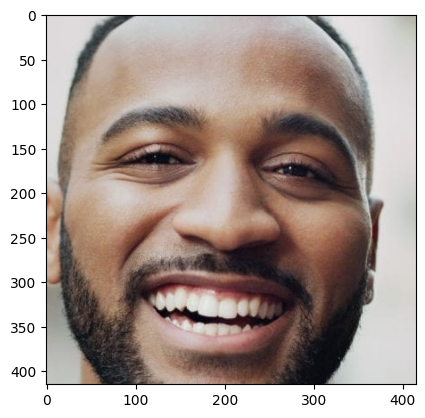

In [ ]:
image = cv2.imread("/content/data/train/Happy/img_Happy_0.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [ ]:
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.HueSaturationValue(p = 0.2),
    A.Sharpen(p=0.2),
    A.Rotate(limit = 20,p =0.2)
])

In [ ]:
transformed_image_1 = transform(image=image)['image']
transformed_image_2 = transform(image=image)['image']
transformed_image_3 = transform(image=image)['image']

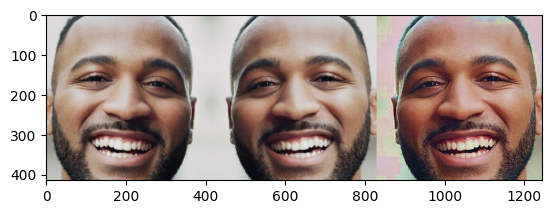

In [ ]:
plt.imshow(np.hstack([transformed_image_1,transformed_image_2,transformed_image_3]))

In [ ]:
def augment(folder_path, num_images = 5):

  import albumentations as A
  transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.HueSaturationValue(p = 0.2),
    A.Sharpen(p=0.2),
    A.Rotate(limit = 20,p =0.2)
    ])

  for folder in os.listdir(folder_path):
    cat_path = os.path.join(folder_path, folder)
    for img_name in os.listdir(cat_path):
      file_path = os.path.join(cat_path, img_name)
      img = cv2.imread(file_path)
      for aug in range(num_images):
        img_aug = transform(image=img)['image']
        # plt.imshow(img_aug)
        cv2.imwrite(os.path.join(cat_path, f"{img_name}_{str(aug)}.jpg"), img_aug)


In [ ]:
augment(paths["train"])

In [ ]:
# Walk through data directory and list number of files
for dirpath, dirnames, filenames in os.walk(paths["data"]):
  print(f"There are {len(dirnames)} folder and {len(filenames)} images in '{dirpath}'.")

There are 2 folder and 0 images in '/content/data'.
There are 3 folder and 0 images in '/content/data/train'.
There are 0 folder and 816 images in '/content/data/train/Angry'.
There are 0 folder and 636 images in '/content/data/train/Sad'.
There are 0 folder and 990 images in '/content/data/train/Happy'.
There are 3 folder and 0 images in '/content/data/test'.
There are 0 folder and 33 images in '/content/data/test/Angry'.
There are 0 folder and 26 images in '/content/data/test/Sad'.
There are 0 folder and 41 images in '/content/data/test/Happy'.


In [ ]:
!zip -r data.zip data/

In [ ]:
# data augmentation
IMG_SIZE = 365
from tensorflow.keras import layers
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255),
])

In [ ]:
!unzip "drive/MyDrive/Imarticus/pga-04/08 DL/cnn/final_data.zip"

In [4]:
paths = {
    "data": os.path.join(os.getcwd(),"final_data"),
    "train": os.path.join(os.getcwd(),"final_data","train"),
    "test": os.path.join(os.getcwd(),"final_data","test")
  }

In [6]:
# image_dataset_from_directory

import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory

train_ds = image_dataset_from_directory(
    directory = paths["train"],
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(350, 350),
    shuffle=True,
    seed=42
)

test_ds = image_dataset_from_directory(
    directory = paths["test"],
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(350, 350),
    shuffle = False
)

Found 2442 files belonging to 3 classes.
Found 100 files belonging to 3 classes.


In [ ]:
def set_seed(seed: int = 42) -> None:
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    tf.experimental.numpy.random.seed(seed)
    tf.random.set_seed(seed)
    # When running on the CuDNN backend, two further options must be set
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    # Set a fixed value for the hash seed
    os.environ["PYTHONHASHSEED"] = str(seed)
    print(f"Random seed set as {seed}")

In [ ]:
# model building
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, GlobalMaxPooling2D

set_seed()

model2 = tf.keras.models.Sequential([
    InputLayer(input_shape = (350,350,3)),
    Conv2D(
        filters = 10,
        kernel_size = (3,3),
        strides=(1,1),
        padding='valid',
        activation = "relu"
    ),
    Conv2D(10,3,1,activation = "relu"),
    MaxPooling2D(),
    Conv2D(10,3,1,activation = "relu"),
    Conv2D(10,3,1,activation = "relu"),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation = "relu"),
    Dense(64, activation = "relu"),
    Dense(3, activation = "softmax")
])

model2.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

result2 = model2.fit(
    train_ds, validation_data = test_ds, epochs = 5
)

Random seed set as 42
Epoch 1/5
77/77 [==============================] - 14s 140ms/step - loss: 19.3279 - accuracy: 0.6163 - val_loss: 0.8111 - val_accuracy: 0.6700
Epoch 2/5
77/77 [==============================] - 10s 127ms/step - loss: 0.2168 - accuracy: 0.9521 - val_loss: 0.7298 - val_accuracy: 0.6900
Epoch 3/5
77/77 [==============================] - 12s 142ms/step - loss: 0.0644 - accuracy: 0.9914 - val_loss: 0.8733 - val_accuracy: 0.7300
Epoch 4/5
77/77 [==============================] - 12s 151ms/step - loss: 0.0225 - accuracy: 0.9971 - val_loss: 0.9548 - val_accuracy: 0.7300
Epoch 5/5
77/77 [==============================] - 14s 161ms/step - loss: 0.0118 - accuracy: 0.9996 - val_loss: 1.2505 - val_accuracy: 0.7400


In [ ]:
set_seed()

model2 = tf.keras.models.Sequential([
    InputLayer(input_shape = (350,350,3)),
    Conv2D(
        filters = 10,
        kernel_size = 5,
        strides=(1,1),
        padding='valid',
        activation = "relu",
        kernel_regularizer = tf.keras.regularizers.L1(
                              l1=0.05)
    ),
    Conv2D(10,5,1,activation = "relu", kernel_regularizer = tf.keras.regularizers.L1(
                              l1=0.05)),
    MaxPooling2D(),
    Conv2D(10,5,1,activation = "relu",kernel_regularizer = tf.keras.regularizers.L1(
                              l1=0.05)),
    MaxPooling2D(),
    Conv2D(10,5,1,activation = "relu", kernel_regularizer = tf.keras.regularizers.L1(
                              l1=0.05)),
    MaxPooling2D(),
    Flatten(),
    tf.keras.layers.Dropout(0.3),
    Dense(128, activation = "relu"),
    Dense(64, activation = "relu"),
    Dense(3, activation = "softmax")
])

model2.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

result2 = model2.fit(
    train_ds, validation_data = test_ds, epochs = 20
)

Random seed set as 42
Epoch 1/20
77/77 [==============================] - 16s 150ms/step - loss: 20.0961 - accuracy: 0.5201 - val_loss: 12.3133 - val_accuracy: 0.6600
Epoch 2/20
77/77 [==============================] - 11s 131ms/step - loss: 10.0100 - accuracy: 0.8444 - val_loss: 9.1842 - val_accuracy: 0.7700
Epoch 3/20
77/77 [==============================] - 12s 148ms/step - loss: 8.1004 - accuracy: 0.9373 - val_loss: 8.2417 - val_accuracy: 0.7700
Epoch 4/20
77/77 [==============================] - 10s 122ms/step - loss: 7.1350 - accuracy: 0.9722 - val_loss: 7.4202 - val_accuracy: 0.8300
Epoch 5/20
77/77 [==============================] - 12s 136ms/step - loss: 6.4200 - accuracy: 0.9918 - val_loss: 6.8190 - val_accuracy: 0.8200
Epoch 6/20
77/77 [==============================] - 12s 150ms/step - loss: 5.8748 - accuracy: 0.9971 - val_loss: 6.4628 - val_accuracy: 0.8100
Epoch 7/20
77/77 [==============================] - 10s 120ms/step - loss: 5.4627 - accuracy: 0.9840 - val_loss: 6.22

In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 348, 348, 10)      280       
                                                                 
 conv2d_9 (Conv2D)           (None, 346, 346, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 173, 173, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 171, 171, 10)      910       
                                                                 
 conv2d_11 (Conv2D)          (None, 169, 169, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 84, 84, 10)        0         
 g2D)                                                 

## Transfer learning

In [12]:
def set_seed(seed: int = 42) -> None:
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    tf.experimental.numpy.random.seed(seed)
    tf.random.set_seed(seed)
    # When running on the CuDNN backend, two further options must be set
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    # Set a fixed value for the hash seed
    os.environ["PYTHONHASHSEED"] = str(seed)
    print(f"Random seed set as {seed}")

In [ ]:
import tensorflow_hub as hub
efficient_net_v2 = hub.KerasLayer("https://www.kaggle.com/models/google/efficientnet-v2/frameworks/TensorFlow2/variations/imagenet1k-b3-feature-vector/versions/2",
                                  trainable=False)


In [ ]:
set_seed()
model3 = tf.keras.models.Sequential([
    # InputLayer(input_shape = (350,350,3)),
    efficient_net_v2,
    Flatten(),
    Dense(64, activation ="relu"),
    Dense(3, activation = "softmax")
])

model3.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = "adam",
    metrics = "accuracy"
)

result3 = model3.fit(train_ds, epochs = 5, validation_data = test_ds)


Random seed set as 42
Epoch 1/5
77/77 [==============================] - 150s 833ms/step - loss: 0.3168 - accuracy: 0.8829 - val_loss: 0.5589 - val_accuracy: 0.8600
Epoch 2/5
77/77 [==============================] - 59s 754ms/step - loss: 0.0928 - accuracy: 0.9697 - val_loss: 0.7424 - val_accuracy: 0.8100
Epoch 3/5
77/77 [==============================] - 58s 751ms/step - loss: 0.0866 - accuracy: 0.9746 - val_loss: 0.5117 - val_accuracy: 0.8900
Epoch 4/5
77/77 [==============================] - 59s 745ms/step - loss: 0.0157 - accuracy: 0.9959 - val_loss: 0.6279 - val_accuracy: 0.8800
Epoch 5/5
77/77 [==============================] - 59s 751ms/step - loss: 0.0719 - accuracy: 0.9779 - val_loss: 0.3804 - val_accuracy: 0.8600


## Functional Api

In [13]:
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, GlobalMaxPooling2D
set_seed()
il = tf.keras.Input(shape = (350,350,3))
scale = tf.keras.layers.Rescaling(1.0/255)(il)
c1 = Conv2D(filters = 8,kernel_size = 3, activation = "relu")(scale)
mp1 = MaxPooling2D()(c1)

c2 = Conv2D(filters = 10,kernel_size = 3, activation = "relu")(mp1)
mp2 = MaxPooling2D()(c2)

c3 = Conv2D(filters = 15,kernel_size = 3, activation = "relu")(mp2)
mp3 = MaxPooling2D()(c3)

flat = Flatten()(mp3)

d1 = Dense(16, activation = "relu")(flat)
ol = Dense(3, activation = "softmax")(d1)

model = tf.keras.Model(inputs = il, outputs = ol)

model.summary()




Random seed set as 42
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 350, 350, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 350, 350, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 348, 348, 8)       224       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 174, 174, 8)       0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 172, 172, 10)      730       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 86, 86, 10)        0         
 g2D)                                

In [14]:
set_seed()
model.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

model.fit(train_ds, validation_data = test_ds, epochs = 5)

Random seed set as 42
Epoch 1/5
77/77 [==============================] - 13s 108ms/step - loss: 0.9639 - accuracy: 0.5172 - val_loss: 0.7760 - val_accuracy: 0.6200
Epoch 2/5
77/77 [==============================] - 11s 128ms/step - loss: 0.5242 - accuracy: 0.7887 - val_loss: 0.5532 - val_accuracy: 0.7700
Epoch 3/5
77/77 [==============================] - 11s 133ms/step - loss: 0.2601 - accuracy: 0.9132 - val_loss: 0.6661 - val_accuracy: 0.7500
Epoch 4/5
77/77 [==============================] - 9s 109ms/step - loss: 0.1498 - accuracy: 0.9550 - val_loss: 0.6607 - val_accuracy: 0.7700
Epoch 5/5
77/77 [==============================] - 11s 123ms/step - loss: 0.0762 - accuracy: 0.9754 - val_loss: 0.6085 - val_accuracy: 0.8100


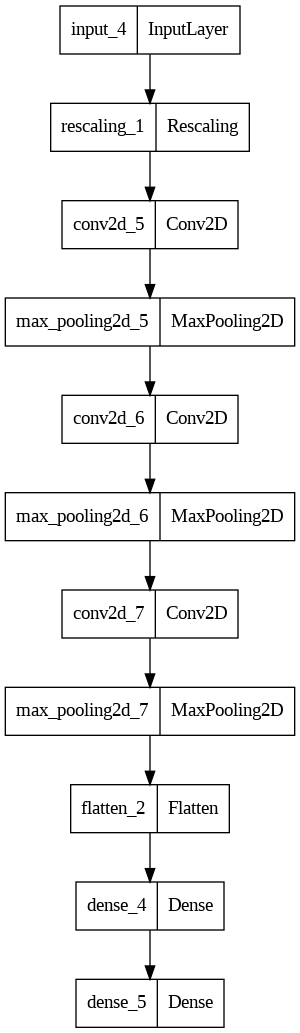

In [15]:
tf.keras.utils.plot_model(model, "my_first_model.png")

## Transfer Learning using Functional api

In [28]:
eb0 = tf.keras.applications.EfficientNetB0(include_top= False, input_shape = (350,350,3))

In [ ]:
for layer_no, layer in enumerate(eb0.layers):
  print(f"{layer_no} -- {layer.trainable} --{layer}")

In [24]:
eb0.layers[218].trainable

True

In [29]:
for layer_no, layer in enumerate(eb0.layers):
  if layer_no < 218:
    layer.trainable = False
  # print(f"{layer_no} -- {layer.trainable} --{layer}")

In [ ]:
eb0.summary()

In [ ]:
for layer_no, layer in enumerate(eb0.layers):
  print(f"{layer_no} -- {layer.trainable} --{layer}")

In [38]:
set_seed()
eb0 = tf.keras.applications.EfficientNetB0(include_top= False, input_shape = (350,350,3))
for layer_no, layer in enumerate(eb0.layers):
  if layer_no < 218:
    layer.trainable = False

il = tf.keras.Input(shape = (350,350,3))
eb = eb0(il)
flat = Flatten()(eb)
drop1 = tf.keras.layers.Dropout(0.4)(flat)
d1 = Dense(16, activation = "relu")(drop1)
drop2 = tf.keras.layers.Dropout(0.3)(d1)
ol = Dense(3, activation = "softmax")(drop2)

model = tf.keras.Model(inputs = il, outputs = ol)

model.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

model.fit(train_ds, validation_data = test_ds, epochs = 10)

Random seed set as 42
Epoch 1/10
77/77 [==============================] - 27s 211ms/step - loss: 0.7224 - accuracy: 0.7396 - val_loss: 0.5951 - val_accuracy: 0.8300
Epoch 2/10
77/77 [==============================] - 15s 184ms/step - loss: 0.2716 - accuracy: 0.8956 - val_loss: 0.9988 - val_accuracy: 0.8800
Epoch 3/10
77/77 [==============================] - 15s 181ms/step - loss: 0.2405 - accuracy: 0.9304 - val_loss: 0.8983 - val_accuracy: 0.8400
Epoch 4/10
77/77 [==============================] - 15s 189ms/step - loss: 0.1648 - accuracy: 0.9541 - val_loss: 1.2166 - val_accuracy: 0.8300
Epoch 5/10
77/77 [==============================] - 15s 192ms/step - loss: 0.1672 - accuracy: 0.9459 - val_loss: 1.1006 - val_accuracy: 0.9000
Epoch 6/10
77/77 [==============================] - 15s 182ms/step - loss: 0.1031 - accuracy: 0.9689 - val_loss: 1.0407 - val_accuracy: 0.8800
Epoch 7/10
77/77 [==============================] - 17s 207ms/step - loss: 0.0852 - accuracy: 0.9730 - val_loss: 1.6182 

In [39]:
set_seed()
efficientnet = tf.keras.applications.EfficientNetV2B0(include_top=False)
for layer_no, layer in enumerate(efficientnet.layers[:-18]):
  layer.trainable = False


il = tf.keras.Input(shape = (350,350,3))
en = efficientnet(il)
flat = Flatten()(en)
# drop = tf.keras.layers.Dropout(0.4)(flat)
d1 = Dense(16, activation = "relu")(flat)
drop = tf.keras.layers.Dropout(0.2)(d1)
d2 = Dense(8, activation = "relu")(drop)
drop = tf.keras.layers.Dropout(0.2)(d2)
ol = Dense(3, activation = "softmax")(drop)

model1 = tf.keras.Model(inputs = il, outputs = ol)


model1.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005),
    metrics = ["accuracy"]
)
model1.fit(train_ds, epochs = 10, validation_data = test_ds)

Random seed set as 42
24274472/24274472 [==============================] - 0s 0us/step
Epoch 1/10
77/77 [==============================] - 34s 269ms/step - loss: 1.1679 - accuracy: 0.5651 - val_loss: 0.5666 - val_accuracy: 0.7700
Epoch 2/10
77/77 [==============================] - 13s 160ms/step - loss: 0.6414 - accuracy: 0.7441 - val_loss: 0.4429 - val_accuracy: 0.8400
Epoch 3/10
77/77 [==============================] - 14s 169ms/step - loss: 0.4905 - accuracy: 0.7903 - val_loss: 0.6260 - val_accuracy: 0.9000
Epoch 4/10
77/77 [==============================] - 14s 174ms/step - loss: 0.4044 - accuracy: 0.8284 - val_loss: 0.5651 - val_accuracy: 0.9000
Epoch 5/10
77/77 [==============================] - 12s 151ms/step - loss: 0.3177 - accuracy: 0.8649 - val_loss: 0.6479 - val_accuracy: 0.8800
Epoch 6/10
77/77 [==============================] - 13s 151ms/step - loss: 0.3017 - accuracy: 0.8735 - val_loss: 0.6589 - val_accuracy: 0.8800
Epoch 7/10
77/77 [==============================] - 13s

## Save Model

In [40]:
model1.save("emotion_detector")

## load model

In [41]:
emd = tf.keras.models.load_model("emotion_detector")
emd.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 350, 350, 3)]     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 flatten_9 (Flatten)         (None, 154880)            0         
                                                                 
 dense_17 (Dense)            (None, 16)                2478096   
                                                                 
 dropout_8 (Dropout)         (None, 16)                0         
                                                                 
 dense_18 (Dense)            (None, 8)                 136       
                                                           

In [42]:
test_img = cv2.imread("/content/final_data/test/Happy/img_Happy_113.jpg")
test_img.shape

(608, 608, 3)

In [44]:
tf.expand_dims(test_img,axis = 0).shape

TensorShape([1, 608, 608, 3])

In [47]:
test_img_resize = cv2.resize(test_img, (350,350))

y_pred_prob = emd.predict(tf.expand_dims(test_img_resize,axis = 0))
y_pred_prob

1/1 [==============================] - 0s 63ms/step


array([[1.5532399e-06, 9.9999845e-01, 5.7538148e-11]], dtype=float32)

In [54]:
y_pred_prob.max()

0.99999845

In [55]:
y_pred = np.argmax(y_pred_prob)
y_pred

1

In [49]:
labels = train_ds.class_names
labels

['Angry', 'Happy', 'Sad']

Text(0.5, 1.0, 'prediction - Happy')

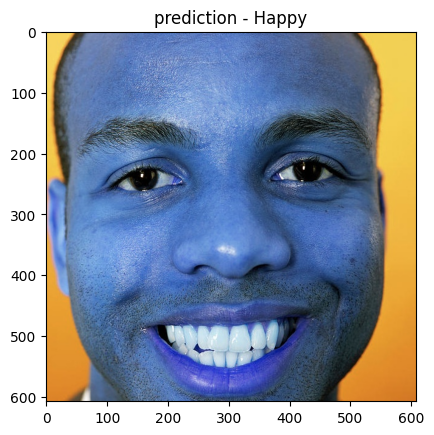

In [52]:
plt.imshow(test_img)
plt.title(f"prediction - {labels[y_pred]}")

In [78]:
def pred(img_add, model = emd, size = 350):
  labels = ['Angry', 'Happy', 'Sad']
  test_img = cv2.imread(img_add)
  test_img_resize = cv2.resize(test_img, (size,size))
  y_pred_prob = model.predict(tf.expand_dims(test_img_resize,axis = 0))
  max_prob = round(y_pred_prob.max(),2)
  # print(max_prob)
  y_pred = np.argmax(y_pred_prob, axis = -1)[0]

  plt.imshow(test_img[:,:,::-1])
  plt.title(f"prediction - {labels[y_pred]} with {str(max_prob)} %")
  plt.show()



1/1 [==============================] - 0s 34ms/step
0.93


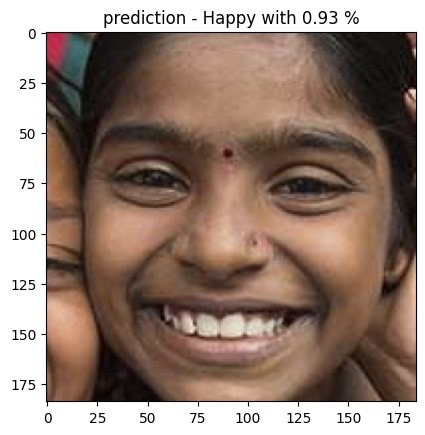

In [79]:
pred("/content/final_data/test/Happy/img_Happy_516.jpg")

In [80]:
# convert into zip

! zip -r emotion_detector.zip emotion_detector/

  adding: emotion_detector/ (stored 0%)
  adding: emotion_detector/fingerprint.pb (stored 0%)
  adding: emotion_detector/variables/ (stored 0%)
  adding: emotion_detector/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: emotion_detector/variables/variables.index (deflated 75%)
  adding: emotion_detector/assets/ (stored 0%)
  adding: emotion_detector/keras_metadata.pb (deflated 96%)
  adding: emotion_detector/saved_model.pb (deflated 91%)
